In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import viz_kmeans

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from pydataset import data

np.set_printoptions(suppress=True)

1. Clustering with the Iris Dataset

- Using this lesson as a guide, perform clustering on the iris dataset.

In [2]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# rename the columns the way I like it to look
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


a. Choose features other than the ones used in the lesson.



In [4]:
X = iris[['petal_width', 'sepal_width']]
X.head(3)

,petal_width,sepal_width
1,0.2,3.5
2,0.2,3.0
3,0.2,3.2


In [5]:
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [6]:
#define the thing
kmeans = KMeans(n_clusters=3)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

In [7]:
iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0


b. Visualize the results of your clustering.



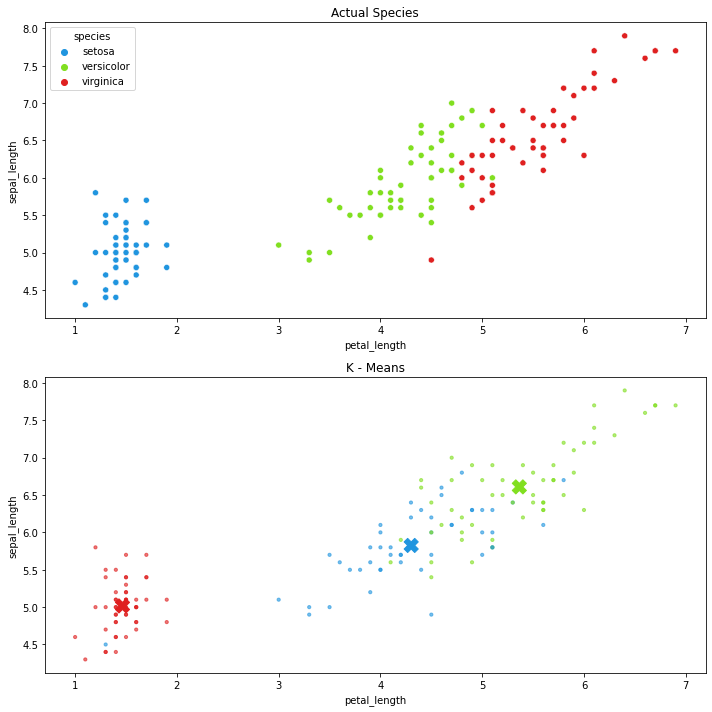

In [8]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris(iris, kmeans)

In [9]:
kmeans.cluster_centers_

array([[-1.25634413,  0.90625492],
       [ 0.1941248 , -1.03317533],
       [ 0.9710555 ,  0.07690277]])

In [10]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled


,petal_width,sepal_width
0,-1.256344,0.906255
1,0.194125,-1.033175
2,0.971055,0.076903


In [11]:
centroids = iris.groupby('cluster')['petal_width', 'sepal_width'].mean()
centroids

,petal_width,sepal_width
cluster,,
0,0.244898,3.451020
1,1.346809,2.608511
2,1.937037,3.090741


In [12]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

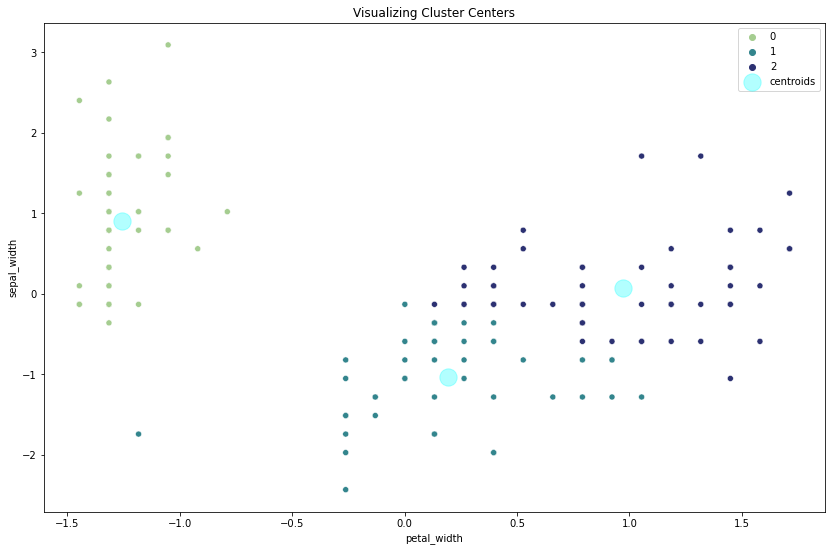

In [13]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster

sns.scatterplot(x='petal_width', y='sepal_width', 
                data= X_scaled, hue='cluster', palette='crest')


# plot cluster centers (centroids)

centroids_scaled.plot.scatter(x='petal_width', y='sepal_width', 
                              ax=plt.gca(), color='cyan', 
                              alpha=0.3, s=300, marker='o', 
                              label='centroids')
    # ax=plt.gca() puts the centroids onto the scatterplot
plt.title('Visualizing Cluster Centers')
plt.legend();

In [14]:
# we dont want a number on cluster anymore
iris['cluster'] = 'cluster' + iris.cluster.astype(str)

<Figure size 1008x648 with 0 Axes>

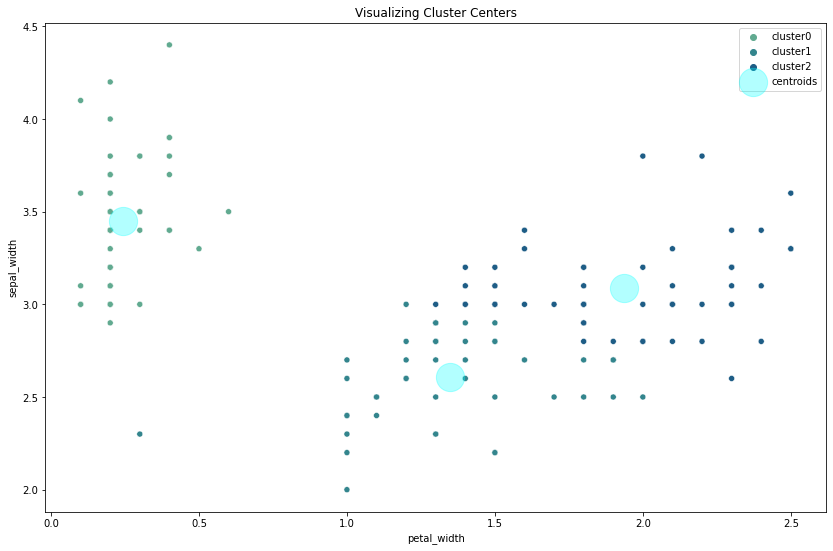

In [15]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y = 'sepal_width', data=iris, hue = 'cluster', palette='crest')

# plot cluster centers (centroids)
centroids.plot.scatter(x = 'petal_width', y = 'sepal_width', ax = plt.gca(), color ='cyan', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [16]:
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

<AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>

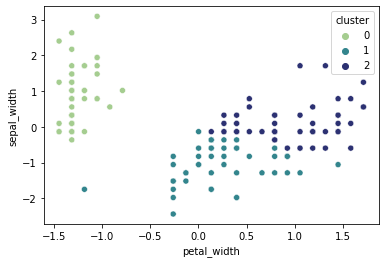

In [17]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
sns.scatterplot(x='petal_width', y='sepal_width', data = X_scaled, hue = 'cluster', palette='crest')

In [18]:
k = 3

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

79.23725838536699

c. Use the elbow method to visually select a good value for k.



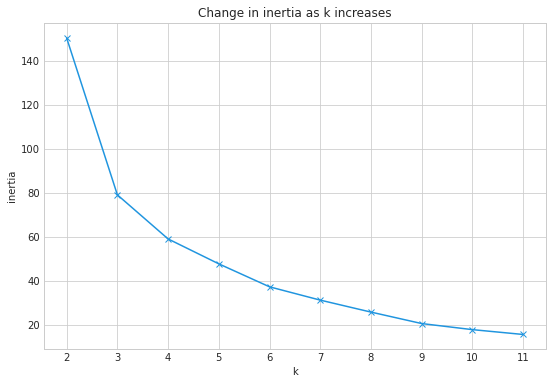

In [19]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    
    # 3 or 4 would work out well

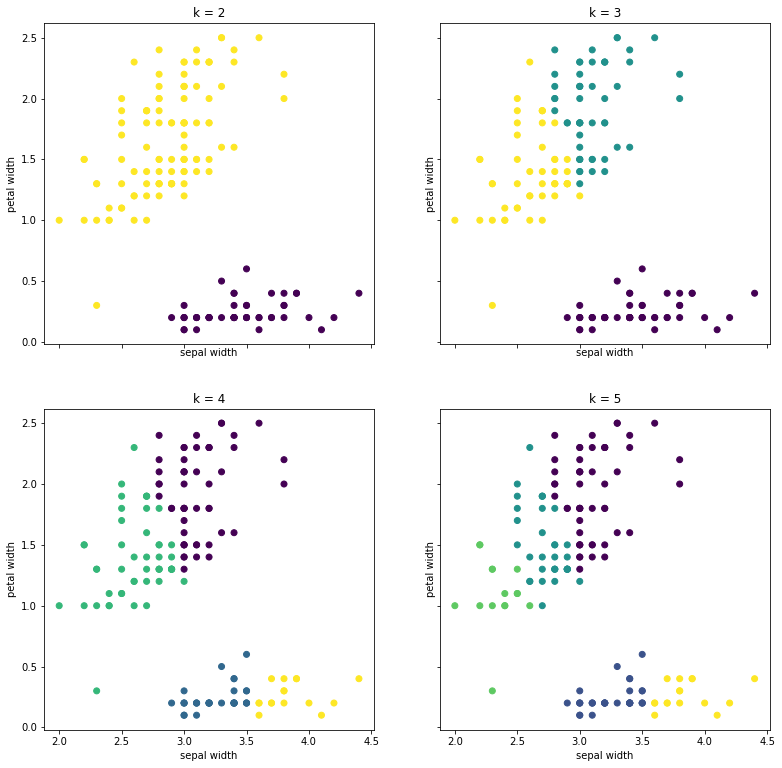

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')
    
# 3 makes the most sense

d. Repeat the clustering, this time with 3 different features.



In [21]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [22]:
# rename the columns the way I like it to look
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [23]:
X = iris[['petal_width', 'sepal_width', 'petal_length']]
X.head(3)

,petal_width,sepal_width,petal_length
1,0.2,3.5,1.4
2,0.2,3.0,1.4
3,0.2,3.2,1.3


In [24]:
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [25]:
#define the thing
kmeans = KMeans(n_clusters=3)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

In [26]:
iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_width   150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   cluster       150 non-null    int32  
dtypes: float64(3), int32(1)
memory usage: 5.3 KB


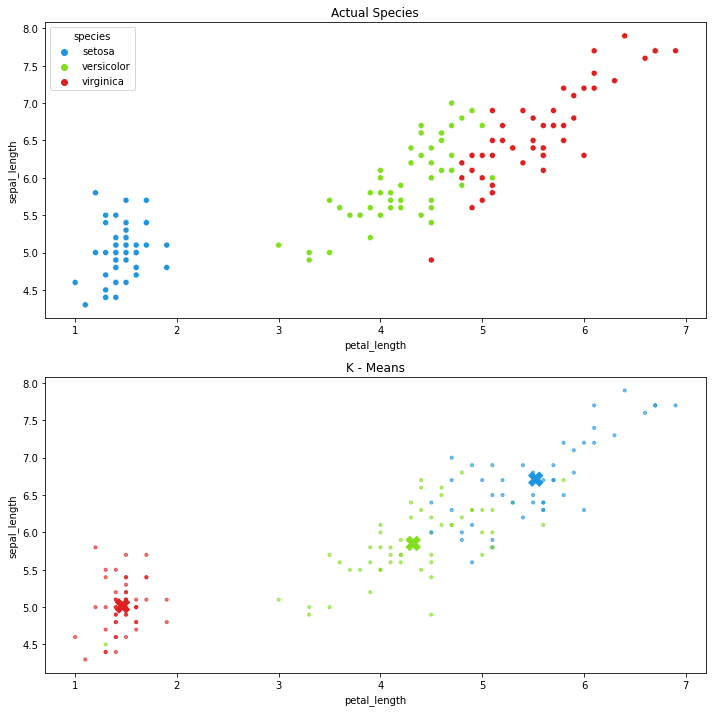

In [27]:
viz_kmeans.viz_iris(iris, kmeans)

In [28]:
kmeans.cluster_centers_

array([[-1.25634413,  0.90625492, -1.30310821],
       [ 1.07682758,  0.1182344 ,  1.00493513],
       [ 0.21866898, -0.90627769,  0.32045975]])

In [29]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,petal_width,sepal_width,petal_length
0,-1.256344,0.906255,-1.303108
1,1.076828,0.118234,1.004935
2,0.218669,-0.906278,0.320460


In [30]:
centroids = iris.groupby('cluster')['petal_width', 'sepal_width', 'petal_length'].mean()
centroids

,petal_width,sepal_width,petal_length
cluster,,,
0,0.244898,3.451020,1.465306
1,2.017391,3.108696,5.526087
2,1.365455,2.663636,4.321818


In [31]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

In [32]:
X_scaled

,petal_width,sepal_width,petal_length,cluster
1,-1.315444,1.019004,-1.340227,0
2,-1.315444,-0.131979,-1.340227,0
3,-1.315444,0.328414,-1.397064,0
4,-1.315444,0.098217,-1.283389,0
5,-1.315444,1.249201,-1.340227,0
6,-1.052180,1.939791,-1.169714,0
7,-1.183812,0.788808,-1.340227,0
8,-1.315444,0.788808,-1.283389,0
9,-1.315444,-0.362176,-1.340227,0
10,-1.447076,0.098217,-1.283389,0


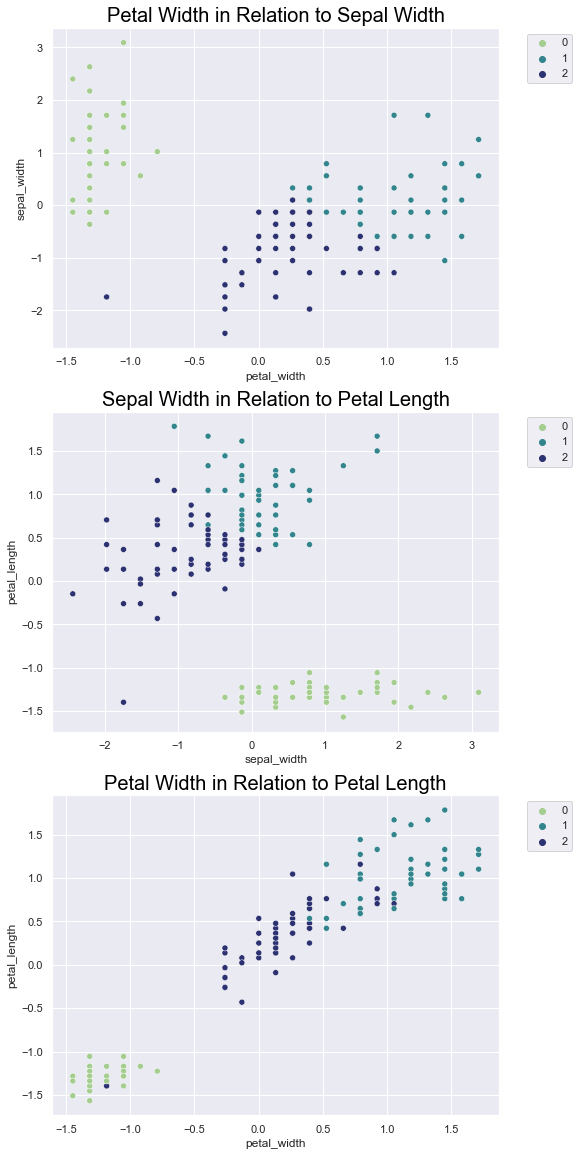

In [33]:
plt.subplots(3, 1, figsize=(8,20), sharey=True)
sns.set(style="darkgrid")

plt.subplot(3,1,1)
plt.title("Petal Width in Relation to Sepal Width", size=20, color='black')
sns.scatterplot(x='petal_width', y='sepal_width', 
                data= X_scaled, hue='cluster', palette='crest')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
plt.subplot(3,1,2)
plt.title("Sepal Width in Relation to Petal Length", size=20, color='black')
sns.scatterplot(x='sepal_width', y='petal_length', 
                data= X_scaled, hue='cluster', palette='crest')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(3,1,3)
plt.title("Petal Width in Relation to Petal Length", size=20, color='black')
sns.scatterplot(x='petal_width', y='petal_length', 
                data= X_scaled, hue='cluster', palette='crest')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


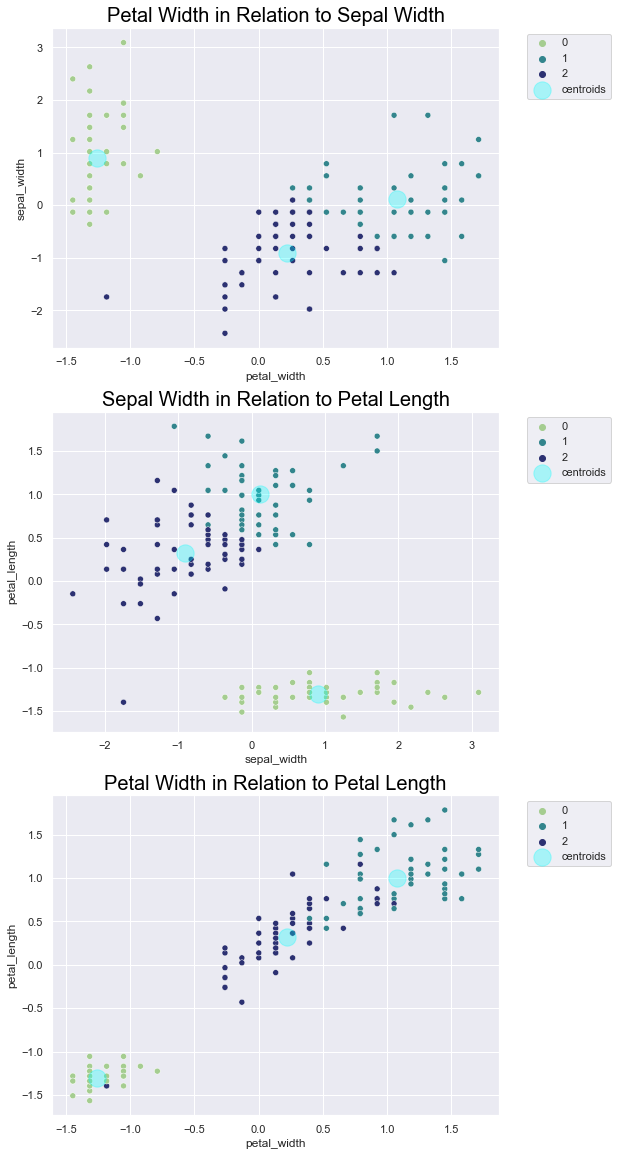

In [34]:
plt.subplots(3, 1, figsize=(8,20), sharey=True)
sns.set(style="darkgrid")

plt.subplot(3,1,1)
plt.title("Petal Width in Relation to Sepal Width", size=20, color='black')
sns.scatterplot(x='petal_width', y='sepal_width', 
                data= X_scaled, hue='cluster', palette='crest')
centroids_scaled.plot.scatter(x='petal_width', y='sepal_width', 
                              ax=plt.gca(), color='cyan', 
                              alpha=0.3, s=300, marker='o', 
                              label='centroids')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
plt.subplot(3,1,2)
plt.title("Sepal Width in Relation to Petal Length", size=20, color='black')
sns.scatterplot(x='sepal_width', y='petal_length', 
                data= X_scaled, hue='cluster', palette='crest')
centroids_scaled.plot.scatter(x='sepal_width', y='petal_length', 
                              ax=plt.gca(), color='cyan', 
                              alpha=0.3, s=300, marker='o', 
                              label='centroids')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(3,1,3)
plt.title("Petal Width in Relation to Petal Length", size=20, color='black')
sns.scatterplot(x='petal_width', y='petal_length', 
                data= X_scaled, hue='cluster', palette='crest')
centroids_scaled.plot.scatter(x='petal_width', y='petal_length', 
                              ax=plt.gca(), color='cyan', 
                              alpha=0.3, s=300, marker='o', 
                              label='centroids')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


In [35]:
iris['cluster'] = 'cluster' + iris.cluster.astype(str)

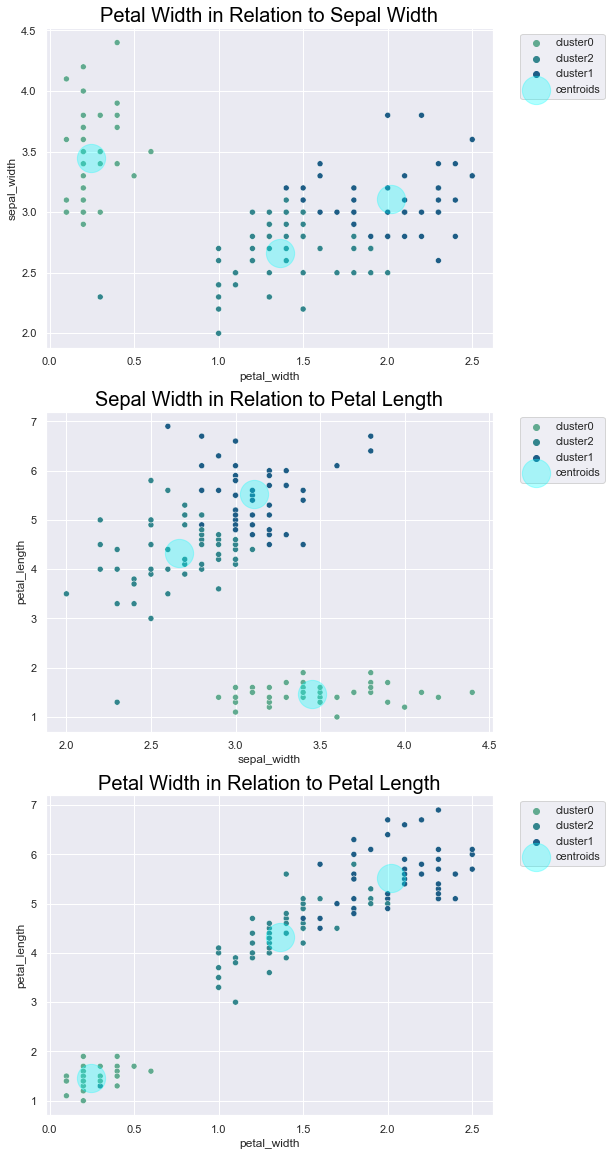

In [36]:
plt.subplots(3, 1, figsize=(8,20), sharey=True)
sns.set(style="darkgrid")

plt.subplot(3,1,1)
plt.title("Petal Width in Relation to Sepal Width", size=20, color='black')
sns.scatterplot(x='petal_width', y='sepal_width', 
                data= iris, hue='cluster', palette='crest')
centroids.plot.scatter(x = 'petal_width', y = 'sepal_width', ax = plt.gca(), 
                       color ='cyan', alpha = 0.3, s = 800, marker = 'o', 
                       label = 'centroids')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
plt.subplot(3,1,2)
plt.title("Sepal Width in Relation to Petal Length", size=20, color='black')
sns.scatterplot(x='sepal_width', y='petal_length', 
                data= iris, hue='cluster', palette='crest')
centroids.plot.scatter(x='sepal_width', y='petal_length', ax = plt.gca(), 
                       color ='cyan', alpha = 0.3, s = 800, marker = 'o', 
                       label = 'centroids')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.subplot(3,1,3)
plt.title("Petal Width in Relation to Petal Length", size=20, color='black')
sns.scatterplot(x='petal_width', y='petal_length', 
                data= iris, hue='cluster', palette='crest')
centroids.plot.scatter(x='petal_width', y='petal_length', ax = plt.gca(), 
                       color ='cyan', alpha = 0.3, s = 800, marker = 'o', 
                       label = 'centroids')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


In [37]:
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

<AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>

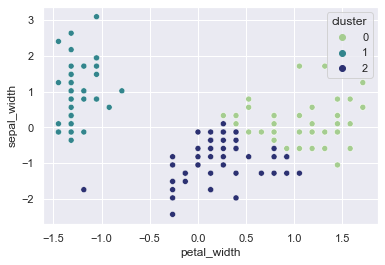

In [38]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

sns.scatterplot(x='petal_width', y='sepal_width', data = X_scaled, hue = 'cluster', palette='crest')

<AxesSubplot:xlabel='sepal_width', ylabel='petal_length'>

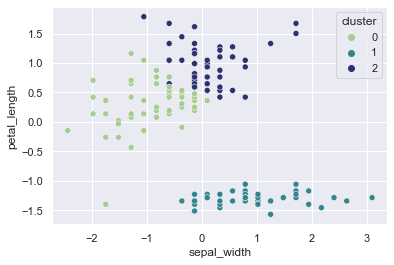

In [39]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

sns.scatterplot(x='sepal_width', y='petal_length', data = X_scaled, hue = 'cluster', palette='crest')

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

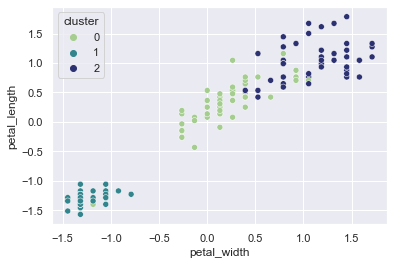

In [40]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

sns.scatterplot(x='petal_width', y='petal_length', data = X_scaled, hue = 'cluster', palette='crest')

In [41]:
k = 3

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

95.31871713891319

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!



In [42]:
mall = pd.read_csv("mall.csv")
mall.head()

,Unnamed: 0,customer_id,gender,age,annual_income,spending_score
0,0,1,Male,19,15,39
1,1,2,Male,21,15,81
2,2,3,Female,20,16,6
3,3,4,Female,23,16,77
4,4,5,Female,31,17,40


In [43]:
X = mall[['annual_income', 'spending_score']]
X.head(5)

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [44]:
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [45]:
#define the thing
kmeans = KMeans(n_clusters=5)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3,
       1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 3, 0, 2, 0, 2, 0,
       3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [46]:
mall['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

mall.head()

,Unnamed: 0,customer_id,gender,age,annual_income,spending_score,cluster
0,0,1,Male,19,15,39,1
1,1,2,Male,21,15,81,4
2,2,3,Female,20,16,6,1
3,3,4,Female,23,16,77,4
4,4,5,Female,31,17,40,1


In [47]:
kmeans.cluster_centers_

array([[ 0.99158305,  1.23950275],
       [-1.30751869, -1.13696536],
       [ 1.05500302, -1.28443907],
       [-0.20091257, -0.02645617],
       [-1.32954532,  1.13217788]])

In [48]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,annual_income,spending_score
0,0.991583,1.239503
1,-1.307519,-1.136965
2,1.055003,-1.284439
3,-0.200913,-0.026456
4,-1.329545,1.132178


In [49]:
centroids = mall.groupby('cluster')['annual_income', 'spending_score'].mean()
centroids

,annual_income,spending_score
cluster,,
0,86.538462,82.128205
1,26.304348,20.913043
2,88.200000,17.114286
3,55.296296,49.518519
4,25.727273,79.363636


In [50]:
kmeans.labels_

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3,
       1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 3, 0, 2, 0, 2, 0,
       3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

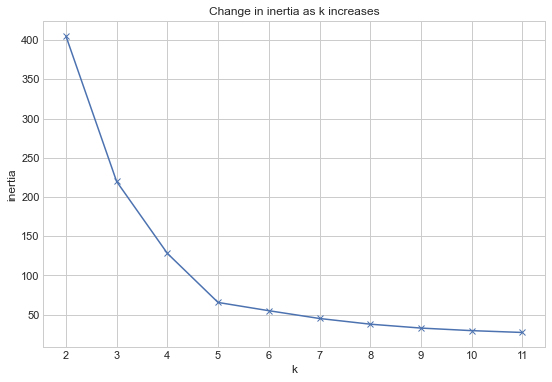

In [51]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    
    # probably 5 or 6

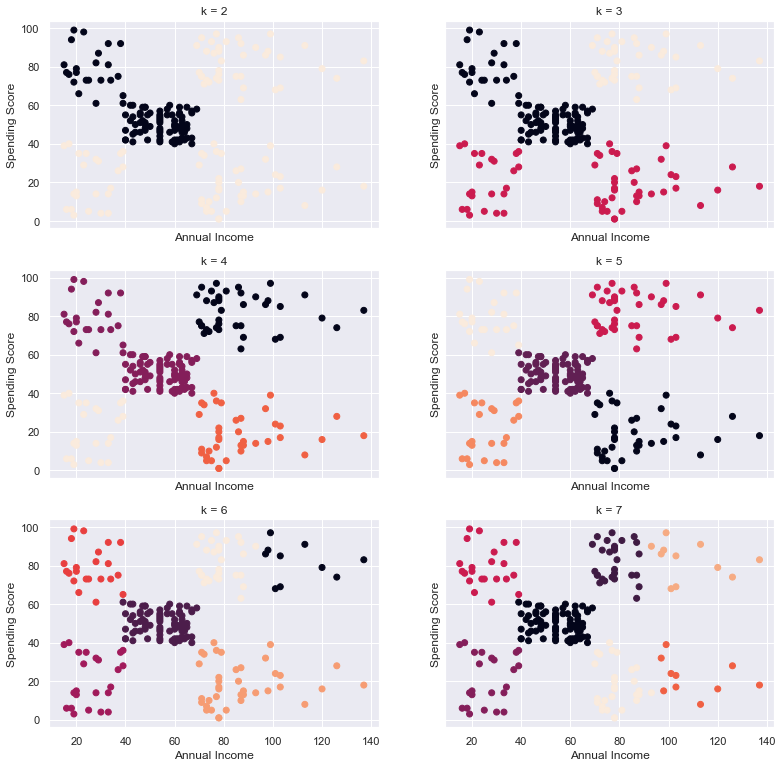

In [68]:
fig, axs = plt.subplots(3, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 8)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.annual_income, X.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='Annual Income', ylabel='Spending Score')

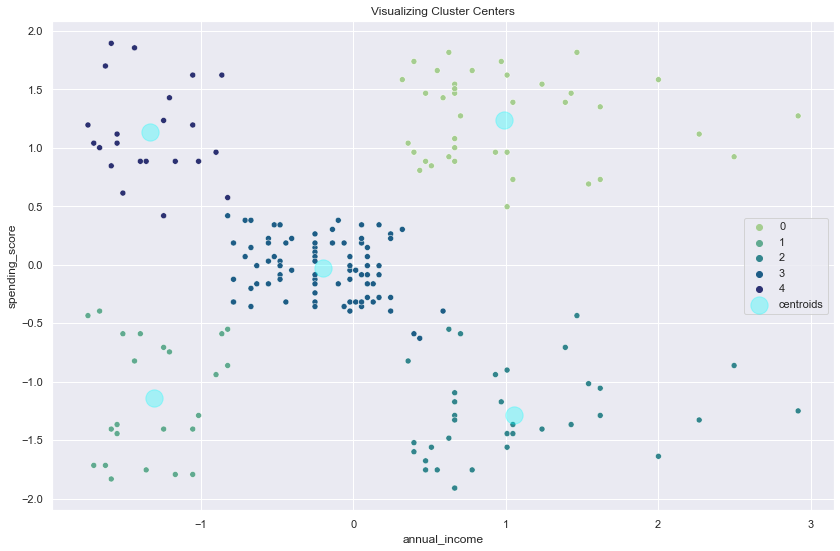

In [53]:

# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster

sns.scatterplot(x='annual_income', y='spending_score', 
                data= X_scaled, hue='cluster', palette='crest')


# plot cluster centers (centroids)

centroids_scaled.plot.scatter(x='annual_income', y='spending_score', 
                              ax=plt.gca(), color='cyan', 
                              alpha=0.3, s=300, marker='o', 
                              label='centroids')
    # ax=plt.gca() puts the centroids onto the scatterplot
plt.title('Visualizing Cluster Centers')
plt.legend();

In [54]:
# we dont want a number on cluster anymore
iris['cluster'] = 'cluster' + iris.cluster.astype(str)

<Figure size 1008x648 with 0 Axes>

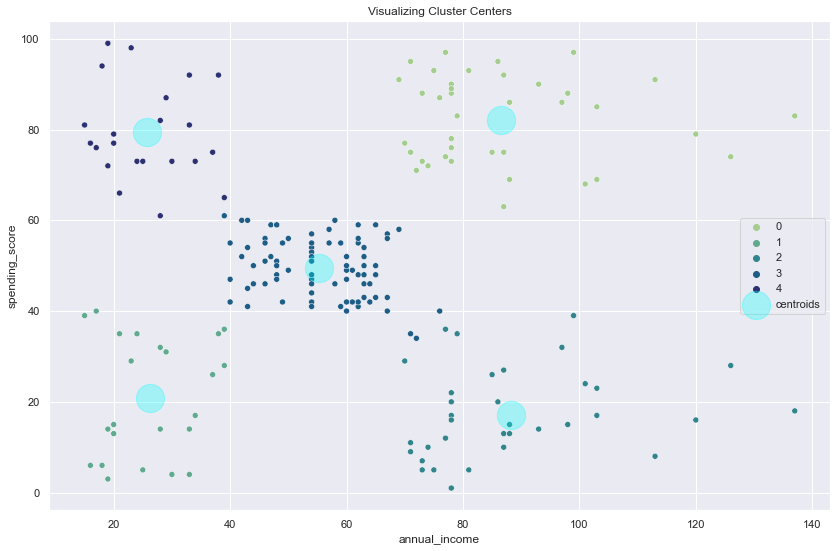

In [55]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x='annual_income', y='spending_score', data=mall, hue = 'cluster', palette='crest')

# plot cluster centers (centroids)
centroids.plot.scatter(x='annual_income', y='spending_score', ax = plt.gca(), color ='cyan', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [56]:
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

<AxesSubplot:xlabel='annual_income', ylabel='spending_score'>

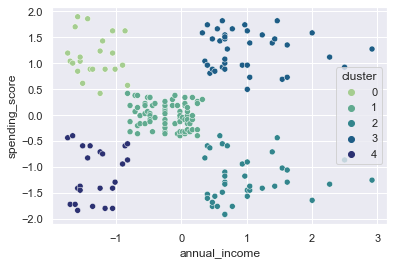

In [60]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
sns.scatterplot(x='annual_income', y='spending_score', data = X_scaled, hue = 'cluster', palette='crest')

In [59]:
k = 5

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

65.79788051130147

3. How does scaling impact the results of clustering? Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually

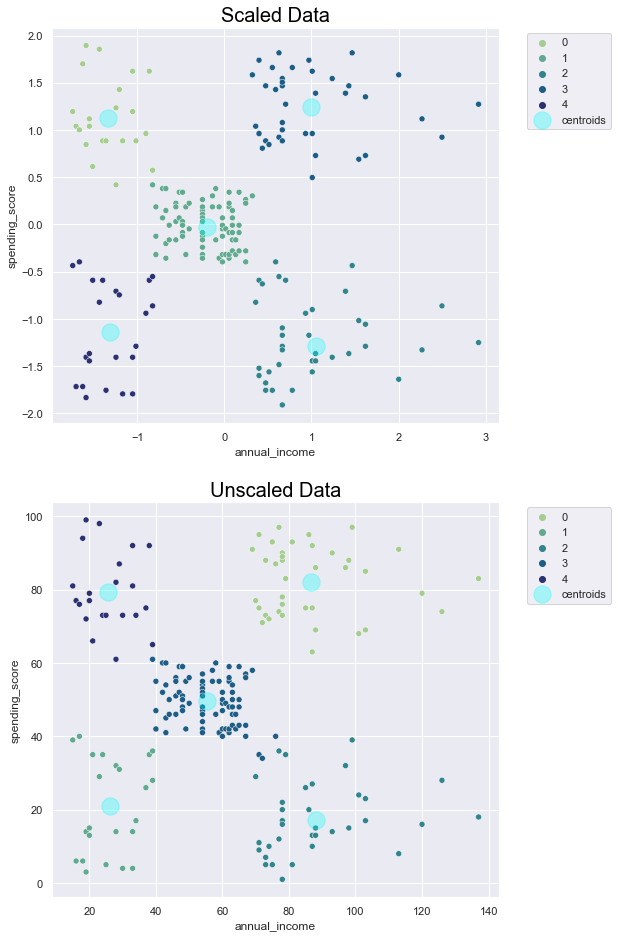

In [63]:
plt.subplots(2, 1, figsize=(8,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,1,1)
plt.title("Scaled Data", size=20, color='black')
sns.scatterplot(x='annual_income', y='spending_score', 
                data= X_scaled, hue='cluster', palette='crest')
centroids_scaled.plot.scatter(x='annual_income', y='spending_score', 
                              ax=plt.gca(), color='cyan', 
                              alpha=0.3, s=300, marker='o', 
                              label='centroids')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
plt.subplot(2,1,2)
plt.title("Unscaled Data", size=20, color='black')
sns.scatterplot(x='annual_income', y='spending_score', data=mall, 
                hue = 'cluster', palette='crest')
centroids.plot.scatter(x='annual_income', y='spending_score', ax = plt.gca(), 
                       color ='cyan', alpha = 0.3, s = 300, marker = 'o', 
                       label = 'centroids')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')